
# Part 2a: Data Cleaning, EDA & Data Pre-processing
***

## (1) Import packages

In [1]:
# General libraries
import pandas as pd
import regex as re
import nltk
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#from IPython.display                 #import display_html
#from IPython.core.display            #import display, HTML

# Cleaning and Preprocessing
import string
import collections

# Modeling libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve


# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## (2) Initial examination

### 2a. Preliminary look at data

In [2]:
anxiety = pd.read_csv('./data/anxiety_data.csv')
depression = pd.read_csv('./data/depression_data.csv')

In [3]:
#view first few rows of each dataset
print("First 5 rows of the \"anxiety\" dataset:")
display(anxiety.head())

print("First 5 rows of the \"depression\" dataset:")
display(depression.head())

First 5 rows of the "anxiety" dataset:


,subreddit,title,selftext
0,Anxiety,Coping,We’re moving out of state and away from everyo...
1,Anxiety,cobweb feeling on face anyone else,NaN
2,Anxiety,Starting a new job anxiety,"As the title says, I’m starting a new job tomo..."
3,Anxiety,anxiety affecting studies,Lately I've been feeling anxious for no appare...
4,Anxiety,This is my recovery story since falling for th...,Last summer when I tried dating apps for the f...


First 5 rows of the "depression" dataset:


,subreddit,title,selftext
0,depression,Lack of cooperation from people: being left ou...,This is a repeat situation. Ignoring me. Is re...
1,depression,I hate to sleep,"I can’t sleep, and I haven’t been sleeping for..."
2,depression,Just another day folks!,Let’s fucking wrap it up and do it all over ag...
3,depression,Everything gets worse. We all just want life t...,[removed]
4,depression,My house is a sad place,It’s been made for business and efficiency lea...


### 2b. Number of rows and columns

In [4]:
# view number of rows and columns in each dataset
print("rows, columns in \"anxiety\" dataset:")
display(anxiety.shape)

print("rows, columns in \"depression\" dataset:")
display(depression.shape)

rows, columns in "anxiety" dataset:


(3069, 3)

rows, columns in "depression" dataset:


(3075, 3)

## (3) Data Cleaning

### 3a. Null values
There are 91 rows without selftext in the anxiety data collected and 6 rows without selftext in the depression data collected. The rows with null values in the depression dataset will be deleted as it does not contain any meaningful data for us to classify. In addition, there is also no way for us to impute the missing data.

In [5]:
# r/anxiety - any nulls?
anxiety.isnull().sum()

subreddit     0
title         0
selftext     91
dtype: int64

In [6]:
# r/depression - any nulls?
depression.isnull().sum()

subreddit    0
title        0
selftext     6
dtype: int64

In [7]:
# Dealing with null values
anxiety.dropna(inplace=True)
depression.dropna(inplace=True)

# Check for null values again
display(anxiety.isnull().sum())
display(depression.isnull().sum())

subreddit    0
title        0
selftext     0
dtype: int64

subreddit    0
title        0
selftext     0
dtype: int64

### 3b. Removed and Deleted posts
In addition, in the anxiety data, there are 99 rows where the selftext is marked as 'removed' and 16 rows where the selftext is marked as 'deleted'. Meanwhile, there are 573 rows where the selftext is marked as 'removed' and 22 rows where the selftext is marked as 'deleted'. Based on research, posts are removed by the moderators of the subreddit and thus labelled 'removed'. By reddit convention, moderators remove posts with offensive content or those that violated the rules set for that subreddit <a href="https://www.reddit.com/r/help/comments/91ni5k/what_do_deleted_and_removed_mean/" target="_blank"><sup>1</sup></a>. Other than that, the spamfilter will also auto-remove spam posts. Meanwhile, posts can be deleted by its author for any reason, from receiving a large number of downvotes, to realising that the post goes against subreddit community conventions <a href="https://www.reddit.com/r/help/comments/dqlmdi/what_is_the_difference_between_removed_and/" target="_blank"><sup>2</sup></a>. As subreddit community conventions has conveniently marked posts that are irrelevant to the topic through these methods, we will delete all rows with posts marked as 'removed' or 'deleted'.

In [8]:
# r/anxiety: return a Series containing counts of unique values
anxiety['selftext'].value_counts()

[removed]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [9]:
# r/depression: return a Series containing counts of unique values
depression['selftext'].value_counts()

[removed]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [10]:
# r/anxiety: Dealing with removed and deleted posts
anxiety = anxiety[anxiety['selftext']!='[removed]']
anxiety = anxiety[anxiety['selftext']!='[deleted]']

In [11]:
# r/depression: Dealing with removed and deleted posts
depression = depression[depression['selftext']!='[removed]']
depression = depression[depression['selftext']!='[deleted]']

### 3c. Merge 'title' and 'selftext' columns
Concatenating the two columns will allow us to focus on analysing the submission as a single block of text, thus allowing for a more attentive analysis.

In [12]:
## r/Anxiety:
# Merging columns to retain meaningful text data
anxiety['post'] = anxiety['title'] + ' ' + anxiety['selftext']

# Delete original title and selftext columns 
anxiety = anxiety.drop(columns=['title','selftext'])

# View top of anxiety dataset now
anxiety.head()

,subreddit,post
0,Anxiety,Coping We’re moving out of state and away from...
2,Anxiety,"Starting a new job anxiety As the title says, ..."
3,Anxiety,anxiety affecting studies Lately I've been fee...
4,Anxiety,This is my recovery story since falling for th...
5,Anxiety,After years wearing braces my teeth still look...


In [13]:
## r/depression:
# Merging columns to retain meaningful text data
depression['post'] = depression['title'] + ' ' + depression['selftext']

# Delete the original title and selftext columns 
depression = depression.drop(columns=['title','selftext'])

# View top of depression dataset now
depression.head()

,subreddit,post
0,depression,Lack of cooperation from people: being left ou...
1,depression,"I hate to sleep I can’t sleep, and I haven’t b..."
2,depression,Just another day folks! Let’s fucking wrap it ...
4,depression,My house is a sad place It’s been made for bus...
5,depression,I just want to die I just hate my life. I need...


### 3d. Merge and Export Cleaned Datasets

In [14]:
# Merge the both datasets into one dataset
both = pd.merge(anxiety, depression, how = 'outer')

# Exporting of merged datasets to csv
anxiety.to_csv('./data/anxiety_cleaned.csv', index=False)
depression.to_csv('./data/depression_cleaned.csv', index=False)
both.to_csv('./data/raw_cleaned.csv', index=False) # combines both raw data collected and cleaned data at each stage for both subreddits

## (4) Data Pre-processing

### 4a. Remove punctuations

In [15]:
# Define function to remove punctuation
def remove_punct(text):
    # store character only if it is not a punctuation
    text_nopunct = ''.join([char for char in str(text) if char not in string.punctuation])
    return text_nopunct

In [16]:
# Remove punctuation from combined dataset
both['post_cleaned'] = both['post'].apply(lambda x: remove_punct(x))

# View sample rows from combined dataset
display(both.head())
display(both.tail())

,subreddit,post,post_cleaned
0,Anxiety,Coping We’re moving out of state and away from...,Coping We’re moving out of state and away from...
1,Anxiety,"Starting a new job anxiety As the title says, ...",Starting a new job anxiety As the title says I...
2,Anxiety,anxiety affecting studies Lately I've been fee...,anxiety affecting studies Lately Ive been feel...
3,Anxiety,This is my recovery story since falling for th...,This is my recovery story since falling for th...
4,Anxiety,After years wearing braces my teeth still look...,After years wearing braces my teeth still look...


,subreddit,post,post_cleaned
5332,depression,"20,M. My “best years” are being wasted and I b...",20M My “best years” are being wasted and I bla...
5333,depression,"I want to die I just want to die, I dont even ...",I want to die I just want to die I dont even w...
5334,depression,Can someone please just reassure me that it'll...,Can someone please just reassure me that itll ...
5335,depression,Tired I remember what it feels like to be happ...,Tired I remember what it feels like to be happ...
5336,depression,Corona has ruined everything I’m almost positi...,Corona has ruined everything I’m almost positi...


### 4b. Remove numbers

In [17]:
# Define function to remove numbers
def remove_num(text):
    # return all chars except numeric 
    text_nonum = ''.join([char for char in text if not char.isdigit()])
    return text_nonum

In [18]:
# Remove numbers from combined dataset
both['post_cleaned'] = both['post_cleaned'].apply(lambda x: remove_num(x))

# View sample rows from combined dataset
display(both.head())
display(both.tail())

,subreddit,post,post_cleaned
0,Anxiety,Coping We’re moving out of state and away from...,Coping We’re moving out of state and away from...
1,Anxiety,"Starting a new job anxiety As the title says, ...",Starting a new job anxiety As the title says I...
2,Anxiety,anxiety affecting studies Lately I've been fee...,anxiety affecting studies Lately Ive been feel...
3,Anxiety,This is my recovery story since falling for th...,This is my recovery story since falling for th...
4,Anxiety,After years wearing braces my teeth still look...,After years wearing braces my teeth still look...


,subreddit,post,post_cleaned
5332,depression,"20,M. My “best years” are being wasted and I b...",M My “best years” are being wasted and I blame...
5333,depression,"I want to die I just want to die, I dont even ...",I want to die I just want to die I dont even w...
5334,depression,Can someone please just reassure me that it'll...,Can someone please just reassure me that itll ...
5335,depression,Tired I remember what it feels like to be happ...,Tired I remember what it feels like to be happ...
5336,depression,Corona has ruined everything I’m almost positi...,Corona has ruined everything I’m almost positi...


### 4c. Tokenization

In [19]:
# Define function to tokenise word in post
def tokenise(text):
    # Matches any character that is neither alphanumeric nor underscore
    # Add a + just in case there are 2 or more spaces between certain words
    tokens = re.split('\W+', text)
    return tokens

In [20]:
# Tokenize data, convert to lowercase in combined dataset
both['post_tokenised'] = both['post_cleaned'].apply(lambda x: tokenise(x.lower()))


# View sample rows from combined dataset
display(both.head())
display(both.tail())

,subreddit,post,post_cleaned,post_tokenised
0,Anxiety,Coping We’re moving out of state and away from...,Coping We’re moving out of state and away from...,"[coping, we, re, moving, out, of, state, and, ..."
1,Anxiety,"Starting a new job anxiety As the title says, ...",Starting a new job anxiety As the title says I...,"[starting, a, new, job, anxiety, as, the, titl..."
2,Anxiety,anxiety affecting studies Lately I've been fee...,anxiety affecting studies Lately Ive been feel...,"[anxiety, affecting, studies, lately, ive, bee..."
3,Anxiety,This is my recovery story since falling for th...,This is my recovery story since falling for th...,"[this, is, my, recovery, story, since, falling..."
4,Anxiety,After years wearing braces my teeth still look...,After years wearing braces my teeth still look...,"[after, years, wearing, braces, my, teeth, sti..."


,subreddit,post,post_cleaned,post_tokenised
5332,depression,"20,M. My “best years” are being wasted and I b...",M My “best years” are being wasted and I blame...,"[m, my, best, years, are, being, wasted, and, ..."
5333,depression,"I want to die I just want to die, I dont even ...",I want to die I just want to die I dont even w...,"[i, want, to, die, i, just, want, to, die, i, ..."
5334,depression,Can someone please just reassure me that it'll...,Can someone please just reassure me that itll ...,"[can, someone, please, just, reassure, me, tha..."
5335,depression,Tired I remember what it feels like to be happ...,Tired I remember what it feels like to be happ...,"[tired, i, remember, what, it, feels, like, to..."
5336,depression,Corona has ruined everything I’m almost positi...,Corona has ruined everything I’m almost positi...,"[corona, has, ruined, everything, i, m, almost..."


### 4d. Remove stopwords

In [21]:
import nltk

# NLTK(Natural Language Toolkit) in python has a list of stopwords stored in 16 different languages.
stopword = nltk.corpus.stopwords.words('english')

In [22]:
# since stopword datatype is a list, we can customise it later if/when necessary
type(stopword)

list

In [23]:
# Define function to remove stopwords
def remove_stopwords(tokenised_list):
    # Store in text only if word is not found in stopword i.e. it is not a stopword
    text = [word for word in tokenised_list if word not in stopword]
    return text

In [24]:
# Remove stopwords in combined dataset
both['post_no_stop'] = both['post_tokenised'].apply(lambda x: remove_stopwords(x))

# View sample rows from combined dataset
display(both.head())
display(both.tail())

,subreddit,post,post_cleaned,post_tokenised,post_no_stop
0,Anxiety,Coping We’re moving out of state and away from...,Coping We’re moving out of state and away from...,"[coping, we, re, moving, out, of, state, and, ...","[coping, moving, state, away, everyone, know, ..."
1,Anxiety,"Starting a new job anxiety As the title says, ...",Starting a new job anxiety As the title says I...,"[starting, a, new, job, anxiety, as, the, titl...","[starting, new, job, anxiety, title, says, sta..."
2,Anxiety,anxiety affecting studies Lately I've been fee...,anxiety affecting studies Lately Ive been feel...,"[anxiety, affecting, studies, lately, ive, bee...","[anxiety, affecting, studies, lately, ive, fee..."
3,Anxiety,This is my recovery story since falling for th...,This is my recovery story since falling for th...,"[this, is, my, recovery, story, since, falling...","[recovery, story, since, falling, pin, code, s..."
4,Anxiety,After years wearing braces my teeth still look...,After years wearing braces my teeth still look...,"[after, years, wearing, braces, my, teeth, sti...","[years, wearing, braces, teeth, still, look, f..."


,subreddit,post,post_cleaned,post_tokenised,post_no_stop
5332,depression,"20,M. My “best years” are being wasted and I b...",M My “best years” are being wasted and I blame...,"[m, my, best, years, are, being, wasted, and, ...","[best, years, wasted, blame, depression, time,..."
5333,depression,"I want to die I just want to die, I dont even ...",I want to die I just want to die I dont even w...,"[i, want, to, die, i, just, want, to, die, i, ...","[want, die, want, die, dont, even, want, talk,..."
5334,depression,Can someone please just reassure me that it'll...,Can someone please just reassure me that itll ...,"[can, someone, please, just, reassure, me, tha...","[someone, please, reassure, itll, ok, im, brit..."
5335,depression,Tired I remember what it feels like to be happ...,Tired I remember what it feels like to be happ...,"[tired, i, remember, what, it, feels, like, to...","[tired, remember, feels, like, happy, actually..."
5336,depression,Corona has ruined everything I’m almost positi...,Corona has ruined everything I’m almost positi...,"[corona, has, ruined, everything, i, m, almost...","[corona, ruined, everything, almost, positive,..."


### 4e. Lemmatise

In [25]:
# import nltk

wn = nltk.WordNetLemmatizer()

In [26]:
# Define function to lemmatise tokenised text
def lemmatise(tokenized_text):
    # return list of all lemmatised words for their corresponding words in tokenized_text
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

In [27]:
# Lemmatise tokens in combined dataset
both['post_lemmatised'] = both['post_no_stop'].apply(lambda x: lemmatise(x))

# View sample rows from combined dataset
display(both.head())
display(both.tail())

,subreddit,post,post_cleaned,post_tokenised,post_no_stop,post_lemmatised
0,Anxiety,Coping We’re moving out of state and away from...,Coping We’re moving out of state and away from...,"[coping, we, re, moving, out, of, state, and, ...","[coping, moving, state, away, everyone, know, ...","[coping, moving, state, away, everyone, know, ..."
1,Anxiety,"Starting a new job anxiety As the title says, ...",Starting a new job anxiety As the title says I...,"[starting, a, new, job, anxiety, as, the, titl...","[starting, new, job, anxiety, title, says, sta...","[starting, new, job, anxiety, title, say, star..."
2,Anxiety,anxiety affecting studies Lately I've been fee...,anxiety affecting studies Lately Ive been feel...,"[anxiety, affecting, studies, lately, ive, bee...","[anxiety, affecting, studies, lately, ive, fee...","[anxiety, affecting, study, lately, ive, feeli..."
3,Anxiety,This is my recovery story since falling for th...,This is my recovery story since falling for th...,"[this, is, my, recovery, story, since, falling...","[recovery, story, since, falling, pin, code, s...","[recovery, story, since, falling, pin, code, s..."
4,Anxiety,After years wearing braces my teeth still look...,After years wearing braces my teeth still look...,"[after, years, wearing, braces, my, teeth, sti...","[years, wearing, braces, teeth, still, look, f...","[year, wearing, brace, teeth, still, look, fuc..."


,subreddit,post,post_cleaned,post_tokenised,post_no_stop,post_lemmatised
5332,depression,"20,M. My “best years” are being wasted and I b...",M My “best years” are being wasted and I blame...,"[m, my, best, years, are, being, wasted, and, ...","[best, years, wasted, blame, depression, time,...","[best, year, wasted, blame, depression, time, ..."
5333,depression,"I want to die I just want to die, I dont even ...",I want to die I just want to die I dont even w...,"[i, want, to, die, i, just, want, to, die, i, ...","[want, die, want, die, dont, even, want, talk,...","[want, die, want, die, dont, even, want, talk,..."
5334,depression,Can someone please just reassure me that it'll...,Can someone please just reassure me that itll ...,"[can, someone, please, just, reassure, me, tha...","[someone, please, reassure, itll, ok, im, brit...","[someone, please, reassure, itll, ok, im, brit..."
5335,depression,Tired I remember what it feels like to be happ...,Tired I remember what it feels like to be happ...,"[tired, i, remember, what, it, feels, like, to...","[tired, remember, feels, like, happy, actually...","[tired, remember, feel, like, happy, actually,..."
5336,depression,Corona has ruined everything I’m almost positi...,Corona has ruined everything I’m almost positi...,"[corona, has, ruined, everything, i, m, almost...","[corona, ruined, everything, almost, positive,...","[corona, ruined, everything, almost, positive,..."


### 4f. Vectorise words in dataframe
CountVectorizer is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.

In [28]:
def countvec_check(value):
    # Create an instance of CountVectorizer and pass in the lemmatise function as the analyzer parameter
    count_vect = CountVectorizer(analyzer = lemmatise)

    # X_counts stores the vectorized version of the data
    X_counts = count_vect.fit_transform(value)

    # Returns the number of rows and columns of X_counts
    print(f'R(Rows, Columns): {X_counts.shape}')

    # Returns the unique words across all posts
    print(count_vect.get_feature_names())

print(countvec_check(both['post_no_stop']))

R(Rows, Columns): (5337, 17818)
['', 'aa', 'aaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa

### 4g. Create sparse matrix

In [29]:
def sparsematrix_check(value):
    # Create an instance of CountVectorizer and pass in the lemmatise function as the analyzer parameter
    count_vect = CountVectorizer(analyzer = lemmatise)

    # X_counts stores the vectorized version of the data
    X_counts = count_vect.fit_transform(value)
    
    # Expand sparse matrix to a collection of arrays and then store it in a data frame
    X_counts_df = pd.DataFrame(X_counts.toarray())
    
    # Apply column name to the dataframe
    X_counts_df.columns = count_vect.get_feature_names()
    
    return X_counts_df

both_sparse_matrix = sparsematrix_check(both['post_no_stop'])

# Returns the number of rows and columns of X_counts
print('Total number of rows and columns:')
print(f'(Rows, Columns): {both_sparse_matrix.shape}')

Total number of rows and columns:
(Rows, Columns): (5337, 17818)


### 4h. Binarise subreddit labels

In [30]:
# Binarise subreddit labels
both['label'] = both['subreddit'].map({'Anxiety': 0, 'depression': 1})

## (5) Exploratory Data Analysis

In [31]:
# Filter combined dataset to get 'Anxiety' dataset
anxiety_cleaned = both[both['subreddit'] == 'Anxiety']

# Filter combined dataset to get 'depression' dataset
depression_cleaned = both[both['subreddit'] == 'depression']

# Create sparse_matrix for both 'Anxiety' and 'depression' data
anxiety_sparse_matrix = sparsematrix_check(anxiety_cleaned['post_no_stop'])
depression_sparse_matrix = sparsematrix_check(depression_cleaned['post_no_stop'])

### 5a. Highly frequent words are co-occuring
When we view the top 30 highly frequent words in each subreddit, we see that there are words that co-occur in both subreddits. We should filter out these words further by customising our stoplist. There are many co-occurring words but we will focus on removing mostly conversational fillers and personal pronouns as we want to avoid eliminating meaningful n-grams that will be useful for analysis.

Conversational fillers are discourse markers, usually short words that do not add to the topic and used by the author subconsciously while writing the post. Fillers found in both r/Anxiety and r/depression include: 'like', 'feel', 'even', 'really', 'think'. Additionally, we will remove common personal pronouns 'im' and 'ive'. These pronouns appear in the posts as the subreddit submissions are usually about personal experiences with anxiety or depression respectively.

In [32]:
# Define function to find highly frequent words
def hi_freq(value, num):
    return value.sum().sort_values(ascending = False).head(num)

# View top 30 highly frequent words in r/Anxiety
print("Top 30 words in r/Anxiety:")
print(hi_freq(anxiety_sparse_matrix, 30).to_string())

Top 30 words in r/Anxiety:
anxiety      4231
like         3282
feel         2989
im           2896
get          2258
know         1830
time         1820
day          1610
really       1532
thing        1379
even         1346
want         1270
dont         1269
go           1215
year         1181
feeling      1129
think        1099
going        1091
people       1059
ive          1033
help         1007
anyone       1004
make          990
one           968
something     948
would         948
work          947
life          945
thought       945
anxious       941


In [33]:
# View top 30 highly frequent words in r/depression
print("Top 30 words in r/depression:")
print(hi_freq(depression_sparse_matrix, 30).to_string())

Top 30 words in r/depression:
feel          3481
im            3394
like          3309
dont          2345
life          2254
want          2224
know          2150
get           1955
even          1719
time          1712
year          1513
thing         1465
people        1449
day           1361
really        1357
one           1252
friend        1215
depression    1149
cant          1124
would         1109
go            1100
never         1030
make          1014
think         1000
ive            997
much           953
going          922
help           899
anything       893
feeling        835


#### Customise stopword list for `r/Anxiety` and `r/depression`

In [34]:
# Define function to remove stop words
def remove_stopwords(tokenized_list, stopword_list):
    # Store in text only if word is not found in stopword 
    text = [word for word in tokenized_list if word not in stopword_list]
    return text

# Customise stopword list
stopwords_custom = ['like', 'feel', 'even', 'really', 'think', 'im', 'ive']

#### `r/Anxiety` : highly frequent words

In [35]:
# Remove stopwords from the 'post' column
anxiety_cleaned['post_no_stop'] = anxiety_cleaned['post_no_stop'].apply(lambda x: remove_stopwords(x, stopwords_custom))

# Create the sparse matrix for r/Anxiety again
anxiety_sparse_matrix = sparsematrix_check(anxiety_cleaned['post_no_stop'])

# View the new top 20 words after the change
print('r/Anxiety: current top 20 highly frequent words:')
print("")
print(hi_freq(anxiety_sparse_matrix, 20).to_string())

r/Anxiety: current top 20 highly frequent words:

anxiety      4231
get          2258
know         1830
time         1820
day          1610
thing        1379
want         1270
dont         1269
go           1215
year         1181
feeling      1129
going        1091
people       1059
help         1007
anyone       1004
make          990
one           968
would         948
something     948
work          947


In [36]:
# Lemmatise the 'post' column in the anxiety_cleaned dataset
anxiety_cleaned['post_lemmatised'] = anxiety_cleaned['post_no_stop'].apply(lambda x: lemmatise(x))

# Join up the words in the 'post_lemmatised' column into string
anxiety_cleaned['post_string'] = anxiety_cleaned['post_lemmatised'].apply(lambda x: ' '.join(x))

#### `r/depression` : highly frequent words

In [37]:
# Remove stopwords from the 'post' column
depression_cleaned['post_no_stop'] = depression_cleaned['post_no_stop'].apply(lambda x: remove_stopwords(x, stopwords_custom))

# Recreate the sparse matrix for r/depression
depression_sparse_matrix = sparsematrix_check(depression_cleaned['post_no_stop'])

# View the new top 20 words after the change
print('r/depression: current top 20 highly frequent words:')
print("")
print(hi_freq(depression_sparse_matrix, 20).to_string())

r/depression: current top 20 highly frequent words:

dont          2345
life          2254
want          2224
know          2150
get           1955
time          1712
year          1513
thing         1465
people        1449
day           1361
one           1252
friend        1215
depression    1149
cant          1124
would         1109
go            1100
never         1030
make          1014
much           953
going          922


In [38]:
# Lemmatise the 'post' column in the depression_cleaned dataset
depression_cleaned['post_lemmatised'] = depression_cleaned['post_no_stop'].apply(lambda x: lemmatise(x))

# Join up the words in the 'post_lemmatised' column into string
depression_cleaned['post_string'] = depression_cleaned['post_lemmatised'].apply(lambda x: ' '.join(x))

#### Data visualisation: `r/Anxiety` Highly Frequent words 
The word that is most frequent in r/Anxiety submissions is anxiety. This is expected, as users are sharing their experiences with the topic. The other highly frequent words are a bit more obscure, hence we will look at bigrams and trigrams.

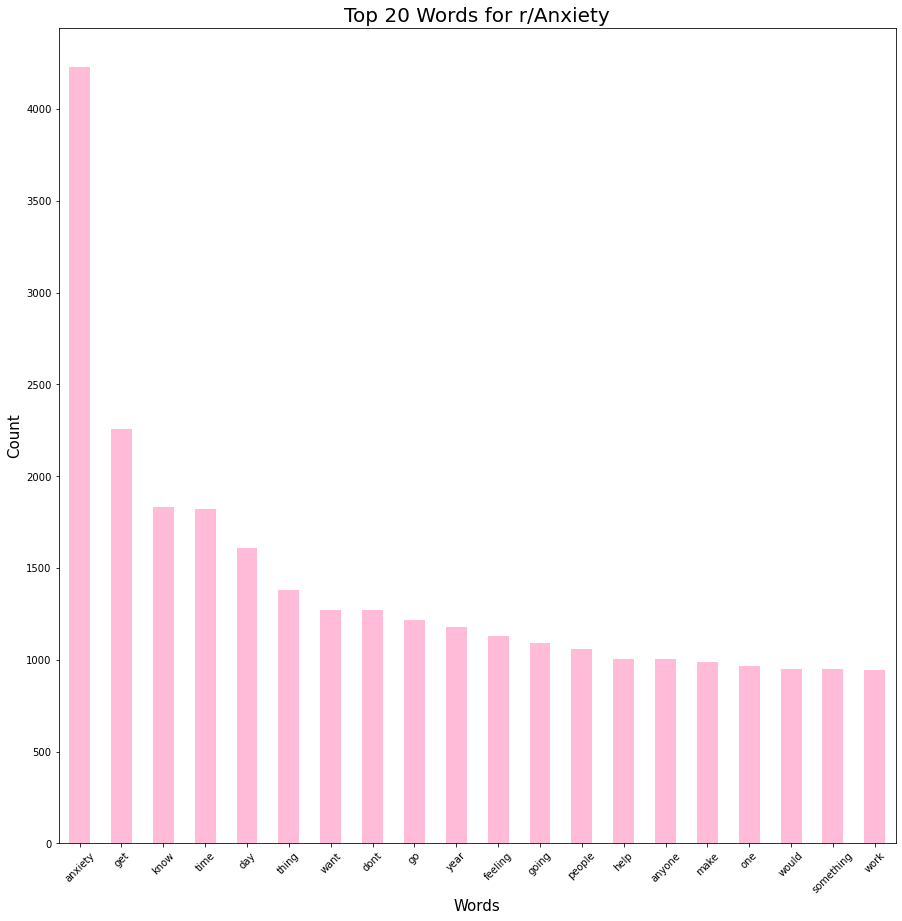

In [39]:
# Convert the hi-freq word count to a dataframe
hi_freq_anxiety = hi_freq(anxiety_sparse_matrix, 20).to_frame()

# Plot a bar chart for top 20 highly frequent words
anxiety_bar = hi_freq_anxiety.plot(kind = 'bar', figsize = (15,15), fontsize = 10, width = 0.5, color = '#FFBBD8')

# Customise settings for bar chart, fontsize=20)
anxiety_bar.set_title('Top 20 Words for r/Anxiety', fontsize=20)
anxiety_bar.get_legend().remove()
anxiety_bar.set_ylabel('Count', fontsize=15)
anxiety_bar.set_xlabel('Words', fontsize=15)
plt.xticks(rotation=45);

#### Data visualisation: `r/depression` Highly Frequent words 
The word that is most frequent in r/Anxiety submissions is don't. This is rather obscure as the negator 'don't' often occurs with a verb, hence we will look at bigrams and trigrams to find out more.

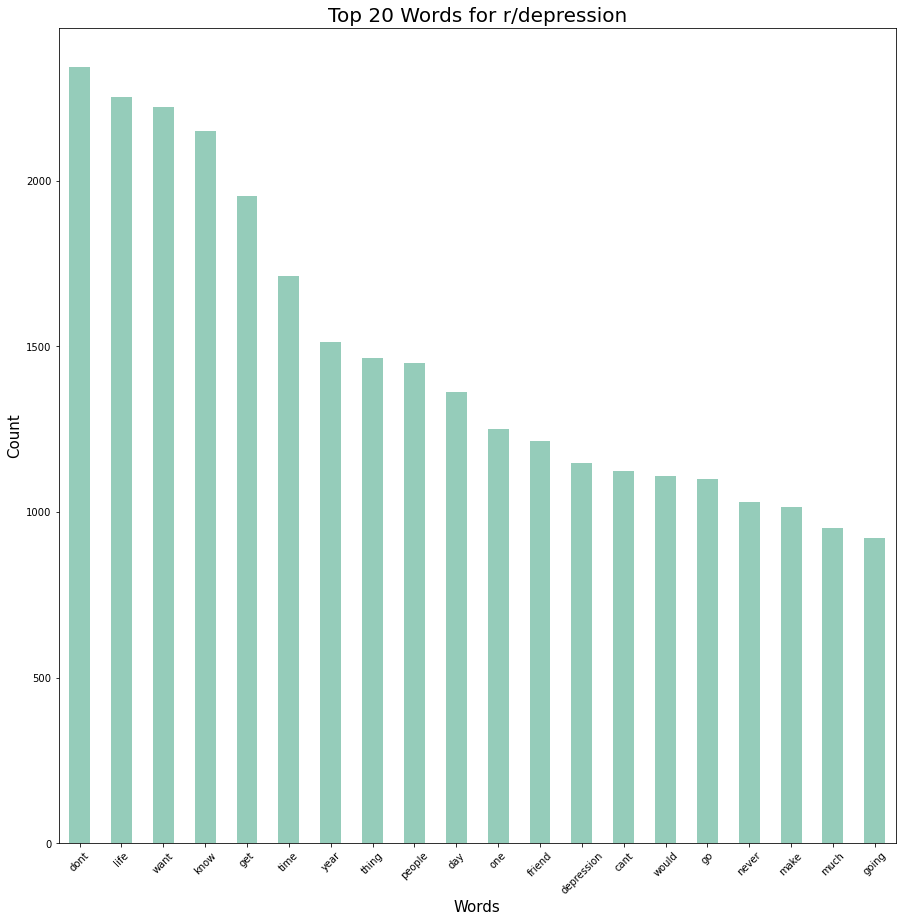

In [40]:
# Convert the hi-freq word count to a dataframe
hi_freq_depression = hi_freq(depression_sparse_matrix, 20).to_frame()

# Plot a bar chart for top 20 highly frequent words
depression_bar = hi_freq_depression.plot(kind = 'bar', figsize = (15,15), fontsize = 10, width = 0.5, color = '#95CCBA')

# Customise settings for bar chart
depression_bar.set_title('Top 20 Words for r/depression', fontsize=20)
depression_bar.get_legend().remove()
depression_bar.set_ylabel('Count', fontsize=15)
depression_bar.set_xlabel('Words', fontsize=15)
plt.xticks(rotation=45);

### 5b. CountVectoriser with n-grams

#### `r/Anxiety` : CountVectoriser with n-grams

In [41]:
# Define function for N-Gram lemmatisation
def lemmatise_ngram(tokenized_text):
    # return string of lemmatised words for words in tokenized_text
    text = ' '.join([wn.lemmatize(word) for word in tokenized_text])
    return text

# Lemmatise the 'post' column in anxiety_cleaned df
anxiety_cleaned['post_lemmatised'] = anxiety_cleaned['post_no_stop'].apply(lambda x: lemmatise_ngram(x))

# Define function to create sparsematrix for N-Gram
def sparsematrix_ngram_check(value, num):
    # Create a ngram
    ngram_vect = CountVectorizer(ngram_range=(num,num))

    # X_counts stores the vectorized version of the data
    X_counts = ngram_vect.fit_transform(value)
    
    # Expand sparse matrix to a collection of arrays and then store it in a data frame
    X_counts_df = pd.DataFrame(X_counts.toarray())
    
    # Apply column name to the dataframe
    X_counts_df.columns = ngram_vect.get_feature_names()
    
    return X_counts_df

#### `r/Anxiety` : bi-grams
The top bigram (two-word phrase) in the anxiety dataset is 'panic attack'. This is consistent with our understanding of anxiety disorder, where one of the symptoms are experiences with panic attacks, where patients report feelings of sudden and intense anxiety. Panic attacks can also have physical symptoms, including shaking, feeling disorientated, nausea, rapid, irregular heartbeats, dry mouth, breathlessness, sweating and dizziness.

In [42]:
# Save bi-gram sparse matrix as both_ngram
anxiety_cleaned_bigram = sparsematrix_ngram_check(anxiety_cleaned['post_lemmatised'], 2)

# Returns the number of rows and columns of X_counts
print('Total number of rows and columns:')
print(anxiety_cleaned_bigram.shape)

Total number of rows and columns:
(2863, 141794)


In [43]:
# View top 20 bi-grams for r/Anxiety
print('Top 20 bi-grams for r/Anxiety')
print(hi_freq(anxiety_cleaned_bigram,20).to_string())

Top 20 bi-grams for r/Anxiety
panic attack      536
dont know         396
anyone else       363
dont want         191
anxiety attack    173
year ago          154
mental health     132
side effect       129
fuck fuck         126
every time        124
last year         123
social anxiety    122
health anxiety    121
go back           111
every day         108
first time        108
heart rate        103
get better         91
get anxious        89
last night         89


#### `r/Anxiety` : tri-grams
The top trigram (three-word phrase) in the anxiety dataset is 'fuck fuck fuck'. The repetition in the expletive suggests that many posts contain expressions of feelings of frustration and unsettledness. Other interesting trigrams that appear here are 'anyone else get' and 'anyone else experience' which suggest that in many posts, users are trying to find connection and validation from their community about anxiety through submitting their post.

In [44]:
# Save tri-gram sparse matrix as both_ngram
anxiety_cleaned_trigram = sparsematrix_ngram_check(anxiety_cleaned['post_lemmatised'], 3)

# Returns the number of rows and columns of X_counts
print('Total number of rows and columns:')
print(anxiety_cleaned_trigram.shape)

Total number of rows and columns:
(2863, 193130)


In [45]:
# View top 20 tri-grams for r/Anxiety
print('Top 20 tri-grams for r/Anxiety')
print(hi_freq(anxiety_cleaned_trigram,20).to_string())

Top 20 tri-grams for r/Anxiety
fuck fuck fuck                  123
anyone else get                  56
anyone else experience           29
anxiety panic attack             28
anyone else experienced          24
cant stop thinking               22
get panic attack                 22
dont know anymore                22
every single day                 21
long story short                 21
wondering anyone else            17
worst case scenario              14
generalized anxiety disorder     14
anxiety anyone else              14
dont want go                     14
year old male                    14
please let know                  13
came back normal                 13
wake middle night                13
mental health issue              13


#### Data visualisation: `r/Anxiety` bigrams

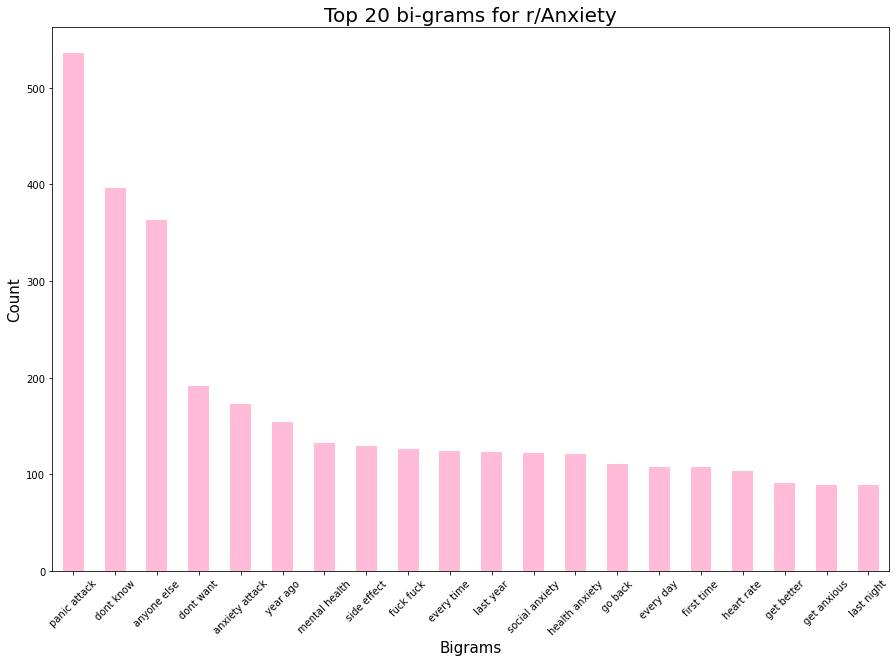

In [46]:
# Convert the top word count to a dataframe
hi_freq_anxiety_bigram = hi_freq(anxiety_cleaned_bigram, 20).to_frame()

# Plot the top 20 words in a bar chart
anxiety_bar_bigram = hi_freq_anxiety_bigram.plot(kind = 'bar', figsize = (15,10), fontsize = 10, width = 0.5, color = '#FFBBD8')

# Set the title, x & y labels and remove legend
anxiety_bar_bigram.set_title('Top 20 bi-grams for r/Anxiety', fontsize=20)
anxiety_bar_bigram.get_legend().remove()
anxiety_bar_bigram.set_ylabel('Count', fontsize=15)
anxiety_bar_bigram.set_xlabel('Bigrams', fontsize=15)
plt.xticks(rotation=45);

#### Data visualisation: `r/Anxiety` trigrams

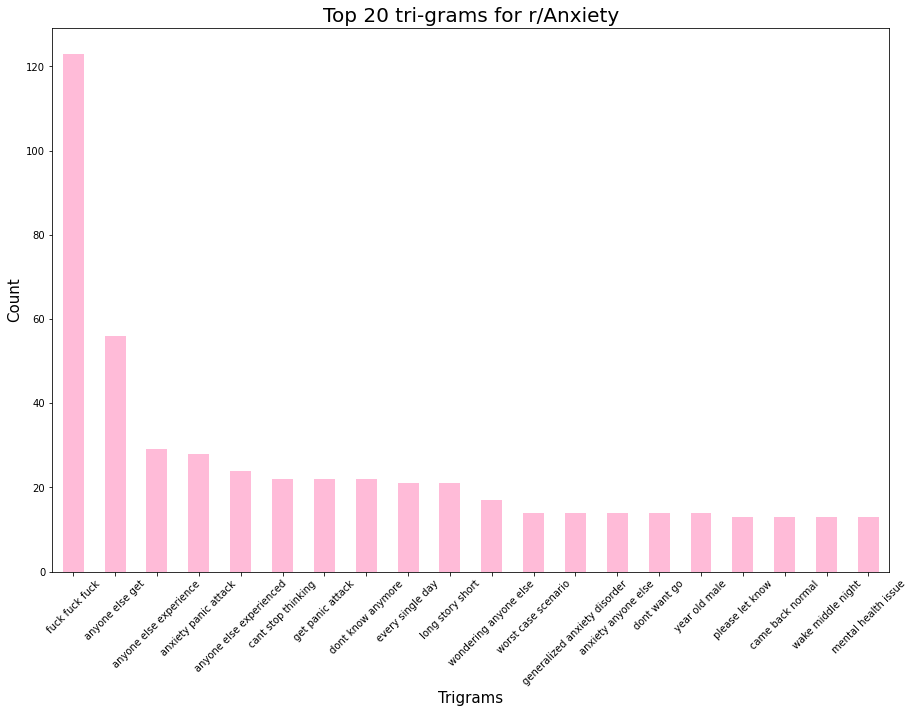

In [47]:
# Convert the top word count to a dataframe
hi_freq_anxiety_trigram = hi_freq(anxiety_cleaned_trigram, 20).to_frame()

# Plot the top 20 words in a bar chart
anxiety_bar_trigram = hi_freq_anxiety_trigram.plot(kind = 'bar', figsize = (15,10), fontsize = 10, width = 0.5, color = '#FFBBD8')

# Set the title, x & y labels and remove legend
anxiety_bar_trigram.set_title('Top 20 tri-grams for r/Anxiety', fontsize=20)
anxiety_bar_trigram.get_legend().remove()
anxiety_bar_trigram.set_ylabel('Count', fontsize=15)
anxiety_bar_trigram.set_xlabel('Trigrams', fontsize=15)
plt.xticks(rotation=45);

#### `r/depression` : CountVectoriser with n-grams

In [48]:
# Lemmatise the 'post' column
depression_cleaned['post_lemmatised'] = depression_cleaned['post_no_stop'].apply(lambda x: lemmatise_ngram(x))

#### `r/depression` : bi-grams
The top bigram in the depression dataset is 'don't want' and 'don't know', followed by repetitive expletive 'fuck fuck'. Interesting bigrams that made it to the list are 'mental health' and 'get better' which suggests that users post to the forum as they are concerned about the mental health disorder they or someone they know is facing, and are concerned with recovery.

In [49]:
# Save bi-gram sparse matrix as both_ngram
depression_cleaned_bigram = sparsematrix_ngram_check(depression_cleaned['post_lemmatised'], 2)

# Returns the number of rows and columns of X_counts
print('Total number of rows and columns:')
print(depression_cleaned_bigram.shape)

Total number of rows and columns:
(2474, 133374)


In [50]:
# View top 20 bi-grams for r/depression
print('Top 20 bi-grams words for r/depression')
print(hi_freq(depression_cleaned_bigram,20).to_string())

Top 20 bi-grams words for r/depression
dont know        643
dont want        390
fuck fuck        375
mental health    171
get better       170
year old         157
every day        146
year ago         126
high school      125
want die         119
last year        107
wish could       103
one day           98
long time         97
first time        95
every time        93
anyone else       90
go back           82
dont care         79
get bed           78


#### `r/depression` : tri-grams
The top trigram in the depression dataset is 'fuck fuck fuck', which mirrors the anxiety dataset as well. Other interesting trigrams that appear here are 'don't know anymore', 'every single day', 'don't want live' and 'don't want die'. These suggest that in many posts, users are comfortable with sharing their feelings of uncertainty, daily experiences with depression, and their fixation with how depression is affecting their will to continue living. It can be inferred that depressive symptoms are more intense in influencing users perception of their life.

In [51]:
# Save bigram sparse matrix as both_ngram
depression_cleaned_trigram = sparsematrix_ngram_check(depression_cleaned['post_lemmatised'], 3)

# Returns the number of rows and columns of X_counts
print('Total number of rows and columns:')
print(depression_cleaned_trigram.shape)

Total number of rows and columns:
(2474, 184295)


In [52]:
# Print top 20 tri-grams for r/depression
print('Top 20 tri-grams for r/depression')
print(hi_freq(depression_cleaned_trigram,20).to_string())

Top 20 tri-grams for r/depression
fuck fuck fuck         367
dont know anymore       44
every single day        33
dont know dont          25
playing video game      20
dont know want          20
want get better         17
dont want live          17
dont know else          15
cant take anymore       15
mental health issue     15
dont want die           15
year high school        15
want go back            15
life dont know          15
want die want           15
dont see point          14
long time ago           14
first time life         14
dont want go            14


#### Data visualisation: `r/depression` bigrams

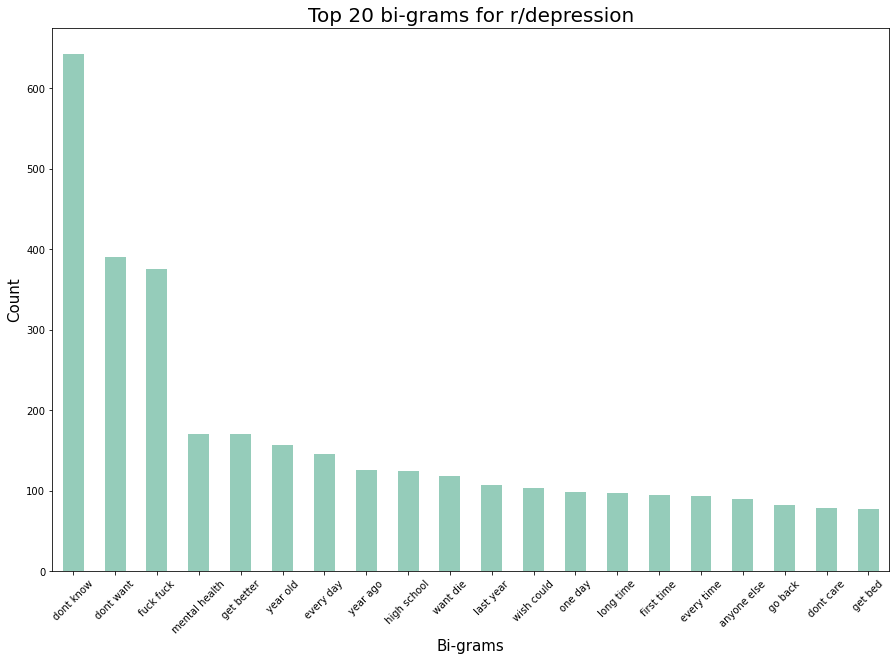

In [53]:
# Convert the top word count to a dataframe
hi_freq_depression_bigram = hi_freq(depression_cleaned_bigram, 20).to_frame()

# Plot the top 20 words in a bar chart
depression_bar_bigram = hi_freq_depression_bigram.plot(kind = 'bar', figsize = (15,10), fontsize = 10, width = 0.5, color = '#95CCBA')

# Set the title, x & y labels and remove legend
depression_bar_bigram.set_title('Top 20 bi-grams for r/depression', fontsize=20)
depression_bar_bigram.get_legend().remove()
depression_bar_bigram.set_ylabel('Count', fontsize=15)
depression_bar_bigram.set_xlabel('Bi-grams', fontsize=15)
plt.xticks(rotation=45);

#### Data visualisation: `r/depression` trigrams

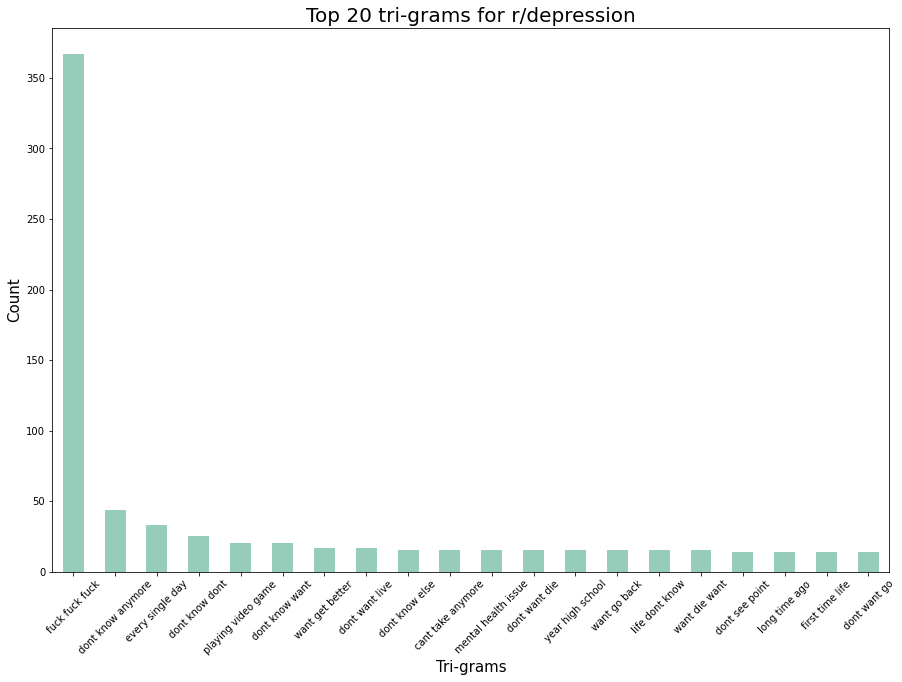

In [54]:
# Convert the top word count to a dataframe
hi_freq_depression_trigram = hi_freq(depression_cleaned_trigram, 20).to_frame()

# Plot the top 20 words in a bar chart
depression_bar_trigram = hi_freq_depression_trigram.plot(kind = 'bar', figsize = (15,10), fontsize = 10, width = 0.5, color = '#95CCBA')

# Set the title, x & y labels and remove legend
depression_bar_trigram.set_title('Top 20 tri-grams for r/depression', fontsize=20)
depression_bar_trigram.get_legend().remove()
depression_bar_trigram.set_ylabel('Count', fontsize=15)
depression_bar_trigram.set_xlabel('Tri-grams', fontsize=15)
plt.xticks(rotation=45);

# Part 2b: Train & Test Classification Models
***

## (6) Prepare for Modelling

### 6a. Combine Datasets

In [55]:
# View top rows of separate cleaned datasets
display(anxiety_cleaned.head())
display(depression_cleaned.head())

,subreddit,post,post_cleaned,post_tokenised,post_no_stop,post_lemmatised,label,post_string
0,Anxiety,Coping We’re moving out of state and away from...,Coping We’re moving out of state and away from...,"[coping, we, re, moving, out, of, state, and, ...","[coping, moving, state, away, everyone, know, ...",coping moving state away everyone know sunday ...,0,coping moving state away everyone know sunday ...
1,Anxiety,"Starting a new job anxiety As the title says, ...",Starting a new job anxiety As the title says I...,"[starting, a, new, job, anxiety, as, the, titl...","[starting, new, job, anxiety, title, says, sta...",starting new job anxiety title say starting ne...,0,starting new job anxiety title say starting ne...
2,Anxiety,anxiety affecting studies Lately I've been fee...,anxiety affecting studies Lately Ive been feel...,"[anxiety, affecting, studies, lately, ive, bee...","[anxiety, affecting, studies, lately, feeling,...",anxiety affecting study lately feeling anxious...,0,anxiety affecting study lately feeling anxious...
3,Anxiety,This is my recovery story since falling for th...,This is my recovery story since falling for th...,"[this, is, my, recovery, story, since, falling...","[recovery, story, since, falling, pin, code, s...",recovery story since falling pin code scam cam...,0,recovery story since falling pin code scam cam...
4,Anxiety,After years wearing braces my teeth still look...,After years wearing braces my teeth still look...,"[after, years, wearing, braces, my, teeth, sti...","[years, wearing, braces, teeth, still, look, f...",year wearing brace teeth still look fucked dup...,0,year wearing brace teeth still look fucked dup...


,subreddit,post,post_cleaned,post_tokenised,post_no_stop,post_lemmatised,label,post_string
2863,depression,Lack of cooperation from people: being left ou...,Lack of cooperation from people being left out...,"[lack, of, cooperation, from, people, being, l...","[lack, cooperation, people, left, people, want...",lack cooperation people left people want get k...,1,lack cooperation people left people want get k...
2864,depression,"I hate to sleep I can’t sleep, and I haven’t b...",I hate to sleep I can’t sleep and I haven’t be...,"[i, hate, to, sleep, i, can, t, sleep, and, i,...","[hate, sleep, sleep, sleeping, long, time, nig...",hate sleep sleep sleeping long time night trie...,1,hate sleep sleep sleeping long time night trie...
2865,depression,Just another day folks! Let’s fucking wrap it ...,Just another day folks Let’s fucking wrap it u...,"[just, another, day, folks, let, s, fucking, w...","[another, day, folks, let, fucking, wrap, hour...",another day folk let fucking wrap hour fuck,1,another day folk let fucking wrap hour fuck
2866,depression,My house is a sad place It’s been made for bus...,My house is a sad place It’s been made for bus...,"[my, house, is, a, sad, place, it, s, been, ma...","[house, sad, place, made, business, efficiency...",house sad place made business efficiency leavi...,1,house sad place made business efficiency leavi...
2867,depression,I just want to die I just hate my life. I need...,I just want to die I just hate my life I need ...,"[i, just, want, to, die, i, just, hate, my, li...","[want, die, hate, life, need, numb, act, const...",want die hate life need numb act constantly ke...,1,want die hate life need numb act constantly ke...


In [56]:
# Merge the 'anxiety_cleaned' and 'depression_cleaned' dataset
combined_cleaned = pd.concat([anxiety_cleaned, depression_cleaned])

In [57]:
# Check the number of rows and columns in the cleaned dataset
print("\"combined_cleaned\" dataset:")
print(f"(Rows, Column): {combined_cleaned.shape}")
print("")
# Check the number of rows and columns in the raw dataset
print("\"both\" dataset:")
print(f"(Rows, Column): {both.shape}")

"combined_cleaned" dataset:
(Rows, Column): (5337, 8)

"both" dataset:
(Rows, Column): (5337, 7)


In [58]:
# View sample rows of the merged cleaned dataset
display(combined_cleaned.head())
display(combined_cleaned.tail())

,subreddit,post,post_cleaned,post_tokenised,post_no_stop,post_lemmatised,label,post_string
0,Anxiety,Coping We’re moving out of state and away from...,Coping We’re moving out of state and away from...,"[coping, we, re, moving, out, of, state, and, ...","[coping, moving, state, away, everyone, know, ...",coping moving state away everyone know sunday ...,0,coping moving state away everyone know sunday ...
1,Anxiety,"Starting a new job anxiety As the title says, ...",Starting a new job anxiety As the title says I...,"[starting, a, new, job, anxiety, as, the, titl...","[starting, new, job, anxiety, title, says, sta...",starting new job anxiety title say starting ne...,0,starting new job anxiety title say starting ne...
2,Anxiety,anxiety affecting studies Lately I've been fee...,anxiety affecting studies Lately Ive been feel...,"[anxiety, affecting, studies, lately, ive, bee...","[anxiety, affecting, studies, lately, feeling,...",anxiety affecting study lately feeling anxious...,0,anxiety affecting study lately feeling anxious...
3,Anxiety,This is my recovery story since falling for th...,This is my recovery story since falling for th...,"[this, is, my, recovery, story, since, falling...","[recovery, story, since, falling, pin, code, s...",recovery story since falling pin code scam cam...,0,recovery story since falling pin code scam cam...
4,Anxiety,After years wearing braces my teeth still look...,After years wearing braces my teeth still look...,"[after, years, wearing, braces, my, teeth, sti...","[years, wearing, braces, teeth, still, look, f...",year wearing brace teeth still look fucked dup...,0,year wearing brace teeth still look fucked dup...


,subreddit,post,post_cleaned,post_tokenised,post_no_stop,post_lemmatised,label,post_string
5332,depression,"20,M. My “best years” are being wasted and I b...",M My “best years” are being wasted and I blame...,"[m, my, best, years, are, being, wasted, and, ...","[best, years, wasted, blame, depression, time,...",best year wasted blame depression time see cha...,1,best year wasted blame depression time see cha...
5333,depression,"I want to die I just want to die, I dont even ...",I want to die I just want to die I dont even w...,"[i, want, to, die, i, just, want, to, die, i, ...","[want, die, want, die, dont, want, talk, anymo...",want die want die dont want talk anymore want ...,1,want die want die dont want talk anymore want ...
5334,depression,Can someone please just reassure me that it'll...,Can someone please just reassure me that itll ...,"[can, someone, please, just, reassure, me, tha...","[someone, please, reassure, itll, ok, british,...",someone please reassure itll ok british girl g...,1,someone please reassure itll ok british girl g...
5335,depression,Tired I remember what it feels like to be happ...,Tired I remember what it feels like to be happ...,"[tired, i, remember, what, it, feels, like, to...","[tired, remember, feels, happy, actually, look...",tired remember feel happy actually look forwar...,1,tired remember feel happy actually look forwar...
5336,depression,Corona has ruined everything I’m almost positi...,Corona has ruined everything I’m almost positi...,"[corona, has, ruined, everything, i, m, almost...","[corona, ruined, everything, almost, positive,...",corona ruined everything almost positive lost ...,1,corona ruined everything almost positive lost ...


## (7) Classification Models

#### Classification Model Prep with `CountVectorizer`

In [59]:
# Convert the 'combined_cleaned' dataset into a sparsematrix
combined_cleaned_cv_sparsematrix = sparsematrix_check(combined_cleaned['post_no_stop'])

# Adding the label column to the sparsematrix
combined_cleaned_cv_sparsematrix['category_label'] = combined_cleaned['label']

# Check the total number of columns and rows
print("Number of rows and columns:")
print(f"(Rows, columns): {combined_cleaned_cv_sparsematrix.shape}")

Number of rows and columns:
(Rows, columns): (5337, 17815)


In [60]:
# Define X and y
X = combined_cleaned_cv_sparsematrix.iloc[:, 0:17814] # Rest of the column except the "category_label" column
y = combined_cleaned_cv_sparsematrix.iloc[:, -1] # Location of the "category_label" column 

In [61]:
# Train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Naive Bayes Multinomial with CountVectorizer

In [62]:
# Instantiate the Naive Bayes Multinomial Model
MultiNB = MultinomialNB()

# Train the Naive Bayes Multinomial Model
MultiNB.fit(X_train, y_train)

# Predict the results using the X_train and X_test
y_pred_train = MultiNB.predict(X_train)
y_pred_test = MultiNB.predict(X_test)

# Save the train and test scores
cv_nb_multinomial_train_score = accuracy_score(y_train, y_pred_train)
cv_nb_multinomial_test_score = accuracy_score(y_test, y_pred_test)

# View the train and test scores
print("Accuracy Scores for the \"Count Vectorizer - Naive Bayes Multinomial\" model:")
print(f"Count Vectorizer - Naive Bayes Multinomial Train Score: {round(cv_nb_multinomial_train_score,4)}")
print(f"Count Vectorizer - Naive Bayes Multinomial Test Score: {round(cv_nb_multinomial_test_score,4)}")

Accuracy Scores for the "Count Vectorizer - Naive Bayes Multinomial" model:
Count Vectorizer - Naive Bayes Multinomial Train Score: 0.9175
Count Vectorizer - Naive Bayes Multinomial Test Score: 0.8644


In [63]:
# Classification Metrics
print("Count Vectorizer - Naive Bayes Multinomial Classification Report:")
print(classification_report(y_test, y_pred_test))

Count Vectorizer - Naive Bayes Multinomial Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       733
           1       0.83      0.88      0.85       602

    accuracy                           0.86      1335
   macro avg       0.86      0.87      0.86      1335
weighted avg       0.87      0.86      0.86      1335



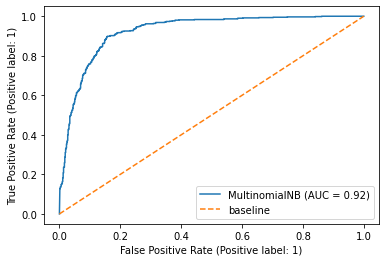

In [64]:
# Plot the ROC curve
plot_roc_curve(MultiNB, X_test, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

### Logistic Regression with CountVectorizer

In [65]:
# Instantiate the Logistic Regression Model
LogReg = LogisticRegression(solver='liblinear')

# Train the Logistic Regression model
LogReg.fit(X_train, y_train)

# Predict the results using the X_train and X_test
y_pred_train = LogReg.predict(X_train)
y_pred_test = LogReg.predict(X_test)

# Save the train and test scores
cv_logistic_train_score = accuracy_score(y_train, y_pred_train)
cv_logistic_test_score = accuracy_score(y_test, y_pred_test)

# View the train and test scores
print("Accuracy Scores for the \"Count Vectorizer - Logistic Regression\" model:")
print(f"Count Vectorizer - Logistic Regression Train Score: {round(cv_logistic_train_score,4)}")
print(f"Count Vectorizer - Logistic Regression Test Score: {round(cv_logistic_test_score,4)}")

Accuracy Scores for the "Count Vectorizer - Logistic Regression" model:
Count Vectorizer - Logistic Regression Train Score: 0.9935
Count Vectorizer - Logistic Regression Test Score: 0.8659


In [66]:
# Classification Metrics
print("Count Vectorizer - Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_test))

Count Vectorizer - Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       733
           1       0.84      0.87      0.85       602

    accuracy                           0.87      1335
   macro avg       0.86      0.87      0.87      1335
weighted avg       0.87      0.87      0.87      1335



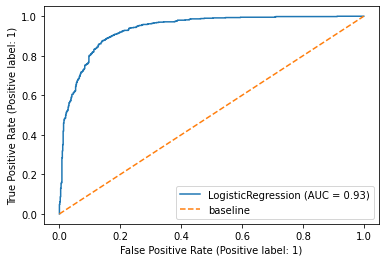

In [67]:
# Plot the ROC curve
plot_roc_curve(LogReg, X_test, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

#### Classification Model Prep with `CountVectorizer(Bigram)`

In [68]:
# Lemmatize the 'post' column for the 'combined_cleaned' dataset
combined_cleaned['post'] = combined_cleaned['post_no_stop'].apply(lambda x: lemmatise_ngram(x))

# Save bigram sparse matrix as combined_df_ngram
combined_cleaned_bigram_sparsematrix = sparsematrix_ngram_check(combined_cleaned['post_lemmatised'], 2)

# Adding the label column to the sparsematrix
combined_cleaned_bigram_sparsematrix['category_label'] = combined_cleaned['label']

# Check the total number of columns and rows
print("Number of rows and columns:")
print(f"(Rows, columns): {combined_cleaned_bigram_sparsematrix.shape}")

Number of rows and columns:
(Rows, columns): (5337, 248445)


In [69]:
# Define X and y
X = combined_cleaned_bigram_sparsematrix.iloc[:, 0:248444] # Rest of the column except the "category_label" column
y = combined_cleaned_bigram_sparsematrix.iloc[:, -1] # Location of the "category_label" column 

In [70]:
# Train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Naive Bayes Multinomial with CountVectorizer(Bigram)

In [71]:
# Instantiate the Naive Bayes Multinomial Model
MultiNB = MultinomialNB()

# Train the Naive Bayes Multinomial Model
MultiNB.fit(X_train, y_train)

# Predicting the results using the X_train and X_test
y_pred_train = MultiNB.predict(X_train)
y_pred_test = MultiNB.predict(X_test)

# Save the train and test scores
bigram_nb_multinomial_train_score = accuracy_score(y_train, y_pred_train)
bigram_nb_multinomial_test_score = accuracy_score(y_test, y_pred_test)

# View the train and test scores
print("Accuracy Scores for the \"BiGram - Naive Bayes Multinomial\" model:")
print(f"BiGram - Naive Bayes Multinomial Train Score: {round(bigram_nb_multinomial_train_score,4)}")
print(f"BiGram - Naive Bayes Multinomial Test Score: {round(bigram_nb_multinomial_test_score,4)}")

Accuracy Scores for the "BiGram - Naive Bayes Multinomial" model:
BiGram - Naive Bayes Multinomial Train Score: 0.9943
BiGram - Naive Bayes Multinomial Test Score: 0.8225


In [72]:
# Classification Metrics
print("BiGram - Naive Bayes Multinomial Classification Report:")
print(classification_report(y_test, y_pred_test))

BiGram - Naive Bayes Multinomial Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       733
           1       0.78      0.84      0.81       602

    accuracy                           0.82      1335
   macro avg       0.82      0.82      0.82      1335
weighted avg       0.83      0.82      0.82      1335



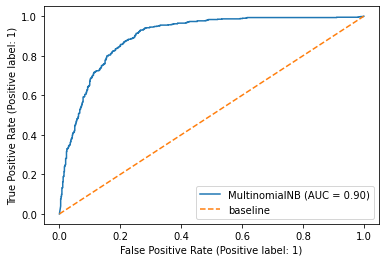

In [73]:
# Plot the ROC curve
plot_roc_curve(MultiNB, X_test, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

### Logistic Regression model with CountVectorizer(Bigram)

In [74]:
# Training the Logistic Regression Model
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(X_train, y_train)

# Predicting the results using the X_train and X_test
y_pred_train = LogReg.predict(X_train)
y_pred_test = LogReg.predict(X_test)

# Saving the train and test scores
bigram_nb_logistic_train_score = accuracy_score(y_train, y_pred_train)
bigram_nb_logistic_test_score = accuracy_score(y_test, y_pred_test)

# Displaying the train and test scores
print("Accuracy Scores for the \"BiGram - Logistic Regression\" model:")
print(f"BiGram - Logistic Regression Train Score: {round(bigram_nb_logistic_train_score,4)}")
print(f"BiGram - Logistic Regression Test Score: {round(bigram_nb_logistic_test_score,4)}")

Accuracy Scores for the "BiGram - Logistic Regression" model:
BiGram - Logistic Regression Train Score: 0.998
BiGram - Logistic Regression Test Score: 0.812


In [75]:
# Display Classification Metrics
print("BiGram - Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_test))

BiGram - Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.80      0.82       733
           1       0.77      0.83      0.80       602

    accuracy                           0.81      1335
   macro avg       0.81      0.81      0.81      1335
weighted avg       0.82      0.81      0.81      1335



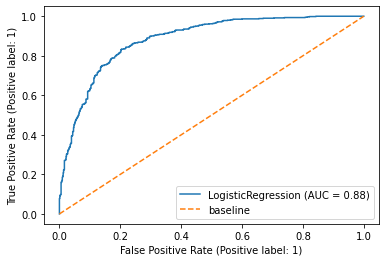

In [76]:
# Plotting of the ROC curve
plot_roc_curve(LogReg, X_test, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

#### Classification Model Prep with `TF-IDF vectoriser`

In [77]:
# Define function to create sparse matrix for TF-IDF
def sparsematrix_tiidf_check(value):
    # Create an instance of CountVectorizer and pass in the clean_text function as the analyzer parameter
    tfidf_vect = TfidfVectorizer(analyzer = lemmatise)

    # X_counts stores the vectorized version of the data
    X_tfidf = tfidf_vect.fit_transform(value)
    
    # Expand sparse matrix to a collection of arrays and then store it in a data frame
    X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
    
    # Apply column name to the dataframe
    X_tfidf_df.columns = tfidf_vect.get_feature_names()
    
    return X_tfidf_df

# Create TF-IDF for r/Anxiety
combined_cleaned_tfidf_sparsematrix = sparsematrix_tiidf_check(combined_cleaned['post_no_stop'])

# Adding the label column to the sparsematrix
combined_cleaned_tfidf_sparsematrix['category_label'] = combined_cleaned['label']

# Check the total number of columns and rows
print("Number of rows and columns:")
print(f"(Rows, columns): {combined_cleaned_tfidf_sparsematrix.shape}")

Number of rows and columns:
(Rows, columns): (5337, 17815)


In [78]:
# Define X and y
X = combined_cleaned_tfidf_sparsematrix.iloc[:, 0:17814] # Rest of the column except the "category_label" column
y = combined_cleaned_tfidf_sparsematrix.iloc[:, -1] # Location of the "category_label" column 

In [79]:
# Train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Naive Bayes Multinomial with TF-IDF vectoriser

In [80]:
# Instantiate the Naive Bayes Multinomial model
MultiNB = MultinomialNB()

# Train the Naive Bayes Multinomial model
MultiNB.fit(X_train, y_train)

# Predict the results using the X_train and X_test
y_pred_train = MultiNB.predict(X_train)
y_pred_test = MultiNB.predict(X_test)

# Save the train and test scores
TFIDF_nb_multinomial_train_score = accuracy_score(y_train, y_pred_train)
TFIDF_nb_multinomial_test_score = accuracy_score(y_test, y_pred_test)

# View the train and test scores
print("Accuracy Scores for the \"TF-IDF - Naive Bayes Multinomial\" model:")
print(f"TF-IDF - Naive Bayes Multinomial Train Score: {round(TFIDF_nb_multinomial_train_score,4)}")
print(f"TF-IDF - Naive Bayes Multinomial Test Score: {round(TFIDF_nb_multinomial_test_score,4)}")

Accuracy Scores for the "TF-IDF - Naive Bayes Multinomial" model:
TF-IDF - Naive Bayes Multinomial Train Score: 0.9185
TF-IDF - Naive Bayes Multinomial Test Score: 0.8562


In [81]:
# Classification Metrics
print("(TF-IDF) - Naive Bayes Multinomial Classification Report:")
print(classification_report(y_test, y_pred_test))

(TF-IDF) - Naive Bayes Multinomial Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       733
           1       0.84      0.84      0.84       602

    accuracy                           0.86      1335
   macro avg       0.85      0.85      0.85      1335
weighted avg       0.86      0.86      0.86      1335



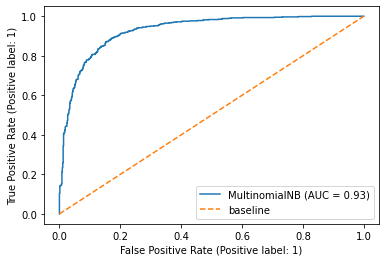

In [82]:
# Plot the ROC curve
plot_roc_curve(MultiNB, X_test, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

### Logistic Regression with TF-IDF vectoriser

In [83]:
# Instantiate the Logistic Regression Model
LogReg = LogisticRegression(solver='liblinear')

# Train the Logistic Regression Model
LogReg.fit(X_train, y_train)

# Predict the results using the X_train and X_test
y_pred_train = LogReg.predict(X_train)
y_pred_test = LogReg.predict(X_test)

# Save the train and test scores
TFIDF_logistic_train_score = accuracy_score(y_train, y_pred_train)
TFIDF_logistic_test_score = accuracy_score(y_test, y_pred_test)

# View the train and test scores
print("Accuracy Scores for the \"TF-IDF - Logistic Regression\" model:")
print(f"TF-IDF - Logistic Regression Train Score: {round(TFIDF_logistic_train_score,4)}")
print(f"TF-IDF - Logistic Regression Test Score: {round(TFIDF_logistic_test_score,4)}")

Accuracy Scores for the "TF-IDF - Logistic Regression" model:
TF-IDF - Logistic Regression Train Score: 0.9435
TF-IDF - Logistic Regression Test Score: 0.8846


In [84]:
# Classification Metrics
print("(TF-IDF) - Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_test))

(TF-IDF) - Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       733
           1       0.87      0.88      0.87       602

    accuracy                           0.88      1335
   macro avg       0.88      0.88      0.88      1335
weighted avg       0.88      0.88      0.88      1335



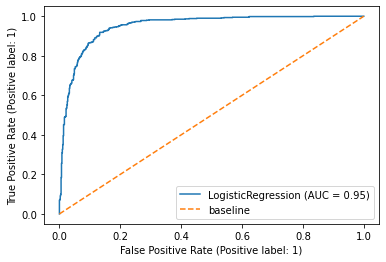

In [85]:
# Plotting of the ROC curve
plot_roc_curve(LogReg, X_test, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

## Summary of Results

|Count vectorisation technique|Model type|Train score|Test score|AUC| 
|:----------------------------|:---------|:---------:|:--------:|:--:|  
|CountVectorizer |Naive-Bayes Multinomial|0.9175|0.8644|0.92|
|CountVectorizer |Logistic Regression|0.9935|0.8659|0.93|
|Bigram |Naive-Bayes Multinomial|0.9943|0.8225|0.90|
|Bigram |Logistic Regression|0.998|0.812|0.88|
|TF-IDF |Naive-Bayes Multinomial|0.9185|0.8562|0.93|
|<font color="blue">TF-IDF </font>|<font color="blue">Logistic Regression</font>|<font color="blue">0.9435</font>|<font color="blue">0.8846</font>|<font color="blue">0.95</font>|




## Conclusions
The Logistic Regression Model is the most successful classification model, with train and test scores of 0.9435 and 0.8846 respectively and AUC value of 0.95. This means that the model is best able to generalise on new text data and accurately identify a text post that contains user's experiences with depression. At the same time, as the model has highest AUC of 0.95, it can best differentiate whether a post contains user's experiences with depression or anxiety.

However, it should be noted that there are a few limitations of this model. As reddit submissions were used as proxy, textual evidence was only limited to the 30 days worth of submissions queried from each subreddit. There could be other pressing issues that plague users with anxiety or depression that were not discussed and/or not captured by the dataset. As Chippy, the app by uniCHIP is designed for local university students, there could also be a lack of representation of this demographic in the respective communities of r/Anxiety and r/depression. As such, future improvements could be made by scraping data of other university forums instead, in order to capture data more representative of our user population. Additionally, analyses were only done on unigrams, bigrams and trigrams, which may not give a full understanding of the submissions posted about the topic. We could further classify posts as user's own experience with anxiety or depression, or caregiver's experience in dealing with someone with the mental health disorder, then conduct sentiment analyses on each type of post.

In reality, there could be co-morbidity amongst users. Patients with mental health disorders can experience both anxiety and depressive symptoms. However, for this project, due to limited internal data, we work on the premise that users submit posts to the subreddit with their predominant symptoms. 

## Recommendations
The mental health illness umbrella is not limited to anxiety and depression. Thus, we can expand this project to classify other prevalent mental health issues as well. Future developments uniCHIP can make to its app, Chippy include a way to automatically identify posts containing user experiences with poor mental health concerns. 

Additionally, collaboration with local mental health resources can bolster uniCHIP's endeavors to achieve its corporate social responsibility goals. Working on a campaign with mental health helplines and national healthcare institutions will further raise awareness for mental health issues and educate users on how to identify and care for someone suffering from poor mental health.
